In [2]:
import pandas as pd

In [3]:
headers = ['symboling', 'normalized_losses', 'make', 'fuel_type',
          'aspiration', 'num_doors', 'body_style', 'drive_wheels',
          'engine_location', 'wheel_base', 'length', 'width', 
           'height', 'curb_weight', 'engine_type', 'num_cylinders',
          'engine_size', 'fuel_system', 'bore', 'stroke',
          'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
          'highway_mpg', 'price']
cars = pd.read_csv('imports-85.data', names=headers)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

### Cleaning and Normalizing Data

In [5]:
import numpy as np

In [6]:
continuous_values_cols = ['normalized_losses', 'wheel_base', 
                          'length', 'width', 'height', 
                          'curb_weight', 'bore', 'stroke', 
                          'compression_ratio', 'horsepower', 
                          'peak_rpm', 'city_mpg', 'highway_mpg', 
                          'price']
numeric_cars = cars[continuous_values_cols]

In [7]:
numeric_cars = numeric_cars.replace('?', np.nan)

In [8]:
numeric_cars = numeric_cars.astype('float')

In [9]:
numeric_cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [10]:
numeric_cars = numeric_cars.dropna(subset=['price'])

In [11]:
numeric_cars.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [12]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [13]:
numeric_cars.isnull().mean()

normalized_losses    0.0
wheel_base           0.0
length               0.0
width                0.0
height               0.0
curb_weight          0.0
bore                 0.0
stroke               0.0
compression_ratio    0.0
horsepower           0.0
peak_rpm             0.0
city_mpg             0.0
highway_mpg          0.0
price                0.0
dtype: float64

In [14]:
price_col = numeric_cars['price']

In [15]:
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [16]:
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


### K-Nearest Neighbor Modeling

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    half_mark = round(df.shape[0] / 2)
    train_set = df.iloc[:half_mark]
    test_set = df.iloc[half_mark:]
    model = KNeighborsRegressor()
    model.fit(train_set[train_col], train_set[target_col])
    predictions = model.predict(test_set[train_col])
    return mean_squared_error(test_set[target_col], 
                              predictions) ** .5

#### Univariate Model using default k value (k=5)

In [31]:
nl = knn_train_test(['normalized_losses'], ['price'], numeric_cars)
wb = knn_train_test(['wheel_base'], ['price'], numeric_cars)
length = knn_train_test(['length'], ['price'], numeric_cars)
width = knn_train_test(['width'], ['price'], numeric_cars)
height = knn_train_test(['height'], ['price'], numeric_cars)
cw = knn_train_test(['curb_weight'], ['price'], numeric_cars)
bore = knn_train_test(['bore'], ['price'], numeric_cars)
stroke = knn_train_test(['stroke'], ['price'], numeric_cars)
cr = knn_train_test(['compression_ratio'], ['price'], numeric_cars)
hp = knn_train_test(['horsepower'], ['price'], numeric_cars)
pr = knn_train_test(['peak_rpm'], ['price'], numeric_cars)
cm = knn_train_test(['city_mpg'], ['price'], numeric_cars)
hm = knn_train_test(['highway_mpg'], ['price'], numeric_cars)

In [36]:
print(
    '''
    Normalized Losses: {:.2f}\n
    Wheel Base: {:.2f}\n
    Length: {:.2f}\n
    Width: {:.2f}\n
    Height: {:.2f}\n
    Curb Weight: {:.2f}\n
    Bore: {:.2f}\n
    Stroke: {:.2f}\n
    Compression Ratio: {:.2f}\n
    Horsepower: {:.2f}\n
    Peak RPM: {:.2f}\n
    City MPG: {:.2f}\n
    Highway MPG: {:.2f}
    '''.format(nl, wb, length,
              width, height, cw,
              bore, stroke, cr, 
               hp, pr, cm, hm)
)


    Normalized Losses: 8131.44

    Wheel Base: 9969.24

    Length: 8304.19

    Width: 7110.41

    Height: 10839.69

    Curb Weight: 5166.83

    Bore: 13397.09

    Stroke: 9334.71

    Compression Ratio: 8096.30

    Horsepower: 4267.73

    Peak RPM: 9759.21

    City MPG: 4814.78

    Highway MPG: 4628.79
    


#### Results

The lowest RMSE values that were returned belonged to Curb Weight, Horsepower, City MPG and Highway MPG. The last three I figured would factor in nicely to the cost of the car. Curb weight, however, was quite a surprise. The overall winner was Horsepower with an RMSE value of about 4200.

### Univariate modeling using different k values

In [37]:
def knn_train_test_v2(train_col, target_col, df, k):
    half_mark = round(df.shape[0] / 2)
    train_set = df.iloc[:half_mark]
    test_set = df.iloc[half_mark:]
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_set[train_col], train_set[target_col])
    predictions = model.predict(test_set[train_col])
    return mean_squared_error(test_set[target_col], 
                              predictions) ** .5

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
k_values = [1, 3, 5, 7, 9]

#### Normalized Losses w/ various k values

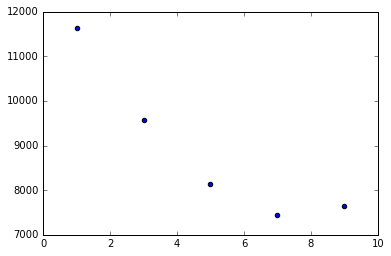

In [42]:
nl_rmse = list()
for k in k_values:
    nl_rmse.append(knn_train_test_v2(['normalized_losses'], 
                                     ['price'],
                                    numeric_cars,
                                    k))
plt.scatter(k_values, nl_rmse)

#### Wheel Base w/ various k values

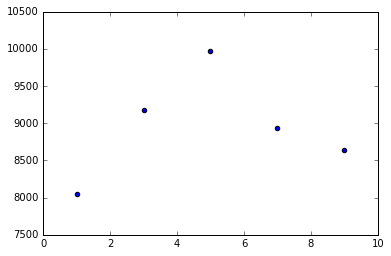

In [43]:
wb_rmse = list()
for k in k_values:
    wb_rmse.append(knn_train_test_v2(['wheel_base'], 
                                     ['price'],
                                    numeric_cars,
                                    k))
plt.scatter(k_values, wb_rmse)

#### Length w/ various k values

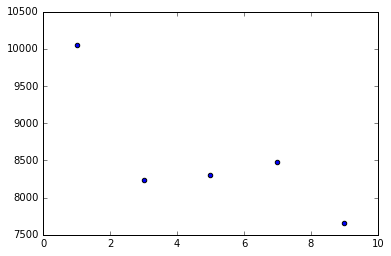

In [44]:
l_rmse = list()
for k in k_values:
    l_rmse.append(knn_train_test_v2(['length'], 
                                     ['price'],
                                    numeric_cars,
                                    k))
plt.scatter(k_values, l_rmse)

#### Width w/ various k values

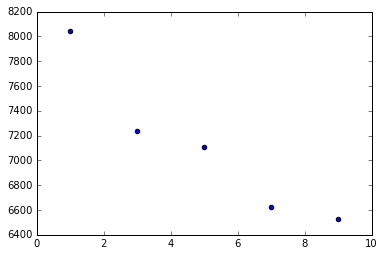

In [45]:
w_rmse = list()
for k in k_values:
    w_rmse.append(knn_train_test_v2(['width'], 
                                     ['price'],
                                    numeric_cars,
                                    k))
plt.scatter(k_values, w_rmse)

#### Height w/ various k values

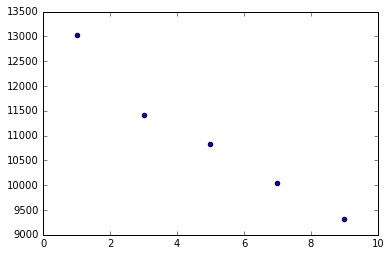

In [46]:
h_rmse = list()
for k in k_values:
    h_rmse.append(knn_train_test_v2(['height'], 
                                     ['price'],
                                    numeric_cars,
                                    k))
plt.scatter(k_values, h_rmse)

#### Curb Weight w/ various k values

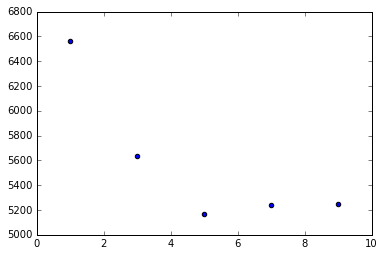

In [47]:
cw_rmse = list()
for k in k_values:
    cw_rmse.append(knn_train_test_v2(['curb_weight'], 
                                     ['price'],
                                    numeric_cars,
                                    k))
plt.scatter(k_values, cw_rmse)

#### Bore w/ various k values

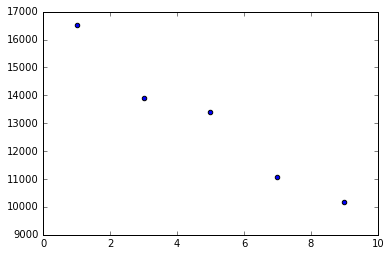

In [48]:
b_rmse = list()
for k in k_values:
    b_rmse.append(knn_train_test_v2(['bore'], 
                                     ['price'],
                                    numeric_cars,
                                    k))
plt.scatter(k_values, b_rmse)

#### Stroke w/ various k values

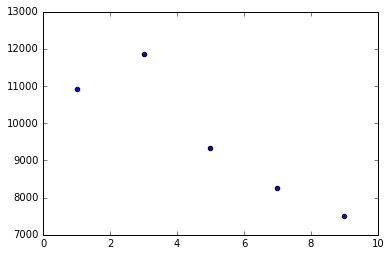

In [49]:
s_rmse = list()
for k in k_values:
    s_rmse.append(knn_train_test_v2(['stroke'], 
                                     ['price'],
                                    numeric_cars,
                                    k))
plt.scatter(k_values, s_rmse)

#### Compression Ratio w/ various k values

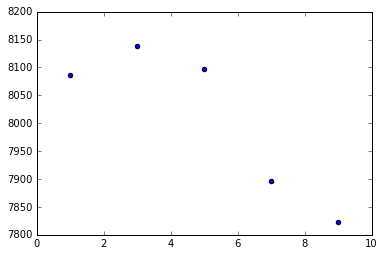

In [50]:
cr_rmse = list()
for k in k_values:
    cr_rmse.append(knn_train_test_v2(['compression_ratio'], 
                                     ['price'],
                                    numeric_cars,
                                    k))
plt.scatter(k_values, cr_rmse)

#### Horsepower w/ various k values

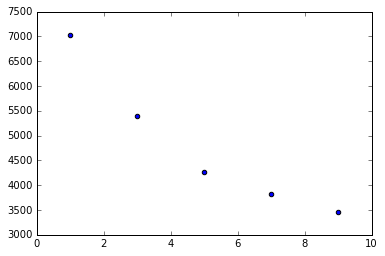

In [51]:
hp_rmse = list()
for k in k_values:
    hp_rmse.append(knn_train_test_v2(['horsepower'], 
                                     ['price'],
                                    numeric_cars,
                                    k))
plt.scatter(k_values, hp_rmse)

#### Peak RPM w/ various k values

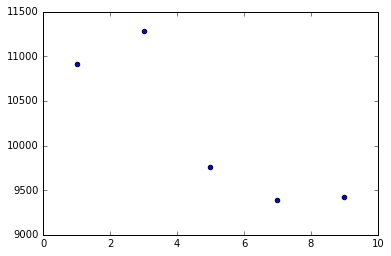

In [52]:
pr_rmse = list()
for k in k_values:
    pr_rmse.append(knn_train_test_v2(['peak_rpm'], 
                                     ['price'],
                                    numeric_cars,
                                    k))
plt.scatter(k_values, pr_rmse)

#### City MPG w/ various k values

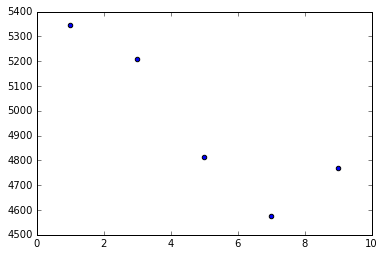

In [53]:
cm_rmse = list()
for k in k_values:
    cm_rmse.append(knn_train_test_v2(['city_mpg'], 
                                     ['price'],
                                    numeric_cars,
                                    k))
plt.scatter(k_values, cm_rmse)

#### Highway MPG w/ various k values

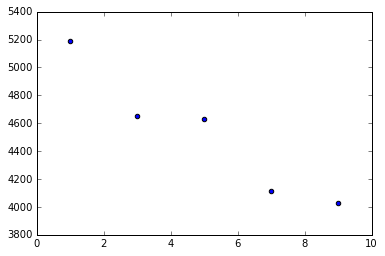

In [54]:
hm_rmse = list()
for k in k_values:
    hm_rmse.append(knn_train_test_v2(['highway_mpg'], 
                                     ['price'],
                                    numeric_cars,
                                    k))
plt.scatter(k_values, hm_rmse)

### Multivariate modeling using default k value (k=5)

In [71]:
def knn_train_test_v3(train_cols, target_col, df):
    half_mark = round(df.shape[0] / 2)
    train_set = df.iloc[:half_mark]
    test_set = df.iloc[half_mark:]
    model = KNeighborsRegressor()
    model.fit(train_set[train_cols], train_set[target_col])
    predictions = model.predict(test_set[train_cols])
    return mean_squared_error(test_set[target_col], 
                              predictions) ** .5

In [64]:
features = ['horsepower', 'highway_mpg', 'city_mpg', 
            'curb_weight', 'width']

In [65]:
two_features = knn_train_test_v3(features[:1], ['price'], numeric_cars)
three_features = knn_train_test_v3(features[:2], ['price'], numeric_cars)
four_features = knn_train_test_v3(features[:3], ['price'], numeric_cars)
five_features = knn_train_test_v3(features, ['price'], numeric_cars)

In [66]:
print(
    '''
    Two Features: {:.2f}\n
    Three Features: {:.2f}\n
    Four Features: {:.2f}\n
    Five Features: {:.2f}\n
    '''.format(two_features, three_features, 
               four_features, five_features)
)


    Two Features: 4267.73

    Three Features: 3315.65

    Four Features: 3842.06

    Five Features: 4472.28

    


### Multivariate modeling using different k values

In [72]:
def knn_train_test_v4(train_cols, target_col, df, k):
    half_mark = round(df.shape[0] / 2)
    train_set = df.iloc[:half_mark]
    test_set = df.iloc[half_mark:]
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_set[train_cols], train_set[target_col])
    predictions = model.predict(test_set[train_cols])
    return mean_squared_error(test_set[target_col], 
                              predictions) ** .5

In [68]:
k_values = [i for i in range(1,26)]

In [70]:
two_rmse = list()
three_rmse = list()
four_rmse = list()

In [73]:
for k in k_values:
    two_rmse.append(knn_train_test_v4(features[:1], ['price'], numeric_cars, k))
    three_rmse.append(knn_train_test_v4(features[:2], ['price'], numeric_cars, k))
    four_rmse.append(knn_train_test_v4(features[:3], ['price'], numeric_cars, k))

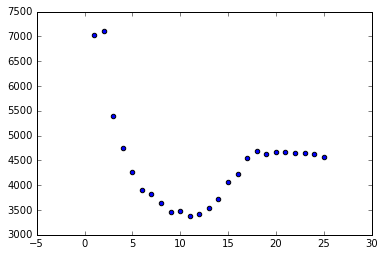

In [74]:
plt.scatter(k_values, two_rmse)

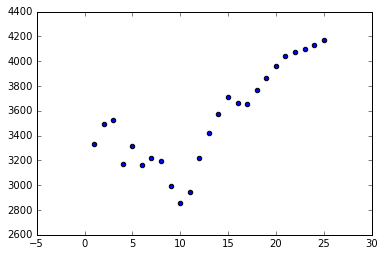

In [75]:
plt.scatter(k_values, three_rmse)

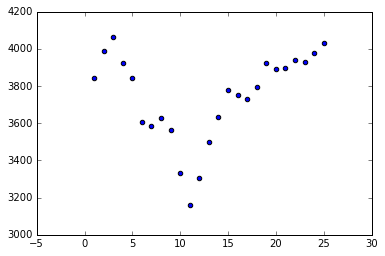

In [76]:
plt.scatter(k_values, four_rmse)

#### Results

The optimal k value for each model is 10 and 11, with 10 giving us the lowest rmse value of 2800. This rmse value was also found using three features which also returned the lowest rmse value when using 5 as the k value.
The differences could be accounted to what neighbors were actually nearby when the data was split between a test and a train group. It is highly likely that if the data was randomized before the split, then the results will be different. 
Also, that one neighbor that splits the two feature and four feature models from the three feature model, could have some outlier data in it, like a much higher price that its neighbors.

Further study
===

+ Modify the `knn_train_test()` function to use k-fold cross validation instead of test/train validation.
+ Modify the `knn_train_test()`